In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# model_name = 'isotropic_vs_scaledIsotropic'
model_name = 'isotropic_different_means'
# model_name = 'isotropic_vs_DiagSpiked'
# model_name = 'uni_vs_bimodal'

folders = [f for f in os.listdir(f'out/{model_name}')]
folders

['mu : 1.25, numDiffLocs : 20, ', 'mu : 1.25, numDiffLocs : 50, ']

In [2]:
folder_name = folders[-1]
print(folder_name)

files = [f for f in os.listdir(f'out/{model_name}/{folder_name}') if f.endswith('.csv')]; files

mu : 1.25, numDiffLocs : 50, 


['2024-12-11_18:05.csv', '2024-12-11_18:02.csv', '2024-12-11_17:58.csv']

In [3]:
file = files[0]
print(file)
data = pd.read_csv(
    f'out/{model_name}/{folder_name}/{file}', index_col=0); data.head(3)

2024-12-11_18:05.csv


,test,sample size,dimension,N_iters,kernel,kernel_bandwith,max conditioning number,num_permutations,percent of rejections
0,FH,75,25,100,default,NaN,100000.0,100,0.92
1,FH,75,50,100,default,NaN,100000.0,100,1.00
2,FH,75,250,100,default,NaN,100000.0,100,0.91


<Figure size 1000x500 with 0 Axes>

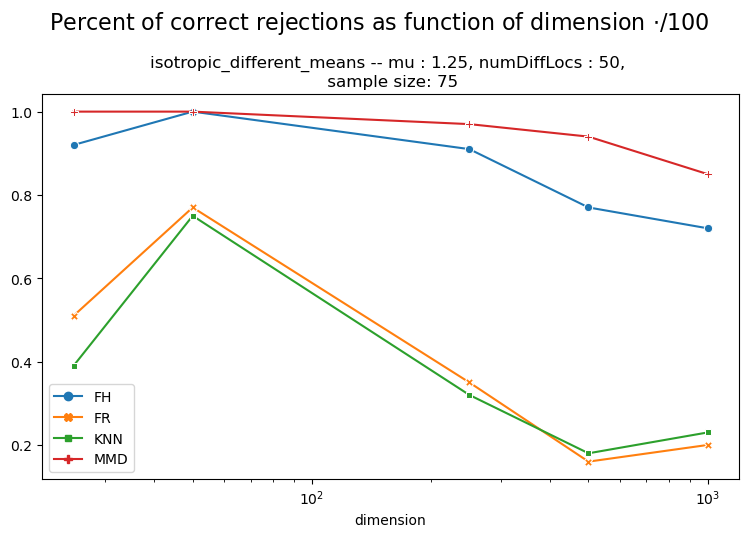

In [4]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize = (9,5))

N_iters = data['N_iters'].values[0]
n = data['sample size'].values[0]


fig.suptitle(f'Percent of correct rejections as function of dimension $\cdot/{N_iters}$', y=1.05, fontsize = 16)
ax.set_title(f'{model_name} -- {folder_name}\n sample size: {n}')
plot_data = data.pivot_table(index = ['sample size', 'dimension'], columns = ['test'], values = ['percent of rejections'] )['percent of rejections'].loc[n]

sns.lineplot( plot_data, markers=True, dashes=False, ax=ax)
# ax.plot(perc_rejects.keys(), perc_rejects.values(), marker='o', linestyle='-',markersize = 5, color='k', label='torchMMD', alpha=0.5)
ax.legend()
ax.set_xscale('log')
# ax.axhline(1, color='k', linestyle='--')
plt.show()


In [ ]:
# # ! pip install git+https://github.com/josipd/torch-two-sample.git
# from torch_two_sample.statistics_diff import MMDStatistic
# import torch
# from tqdm import tqdm
# from models import models_classes as models

# N_iters = data['N_iters'].values[0]
# n = data['sample size'].values[0]
# num_permutations = data['num_permutations'].values[0]

# model_params = {}
# for _ in folder_name.split(', ')[:-1]:
#     model_params.update({_.split(' : ')[0]: float(_.split(' : ')[1])})

# _model_ = { 'isotropic_vs_scaledIsotropic': models.isotropic_vs_scaledIsotropic, 
#             'isotropic_different_means': models.isotropic_different_means,
#             'isotropic_vs_DiagSpiked': models.isotropic_vs_DiagSpiked}

# perc_rejects = {}
# for d in data.dimension.unique():
#     rej = []
#     for _ in tqdm(range(N_iters)):
#         X = _model_[model_name](**model_params)(d).sample_X(n)
#         Y = _model_[model_name](**model_params)(d).sample_Y(n)
#         X_torch = torch.autograd.Variable(torch.tensor(X, dtype=torch.float32))
#         Y_torch = torch.autograd.Variable(torch.tensor(Y, dtype=torch.float32))
#         _stat = MMDStatistic(n,n)
#         obs_val, distance_matrix = _stat(X_torch, Y_torch, [1e-2], ret_matrix=True)
#         torch_pval = _stat.pval(distance_matrix, num_permutations).__round__(3)
#         rej.append(torch_pval < 0.05)
#     perc_rejects.update({d: sum(rej)/N_iters})


In [ ]:
N_iter = 100
num_permutations = 250
kernel_name = 'laplacian'
sigma_kernel = 15
kappa_Kmat = 1e6
sample_size = 50
dimension = 100
filtered_data = data.loc[(N_iter, num_permutations, kernel_name, ridge,n)].groupby('d').mean()


In [ ]:

fig, [axl,axr] = plt.subplots(ncols = 2, figsize=(10,5))
fig.suptitle(folder_name,fontsize=18,y=1.08)
axl.set_title('{} iterations, {} bootstrap samples \n{} kernel, ridge = {}\n\nn = {}'
             .format(N_iter, num_permutations, kernel_name, ridge,n), x = 1.1)
sns.lineplot(data=filtered_data, ax=axl)
axl.set_ylim(0,1.01)

sns.heatmap(filtered_data.T, annot=True, cmap='coolwarm_r', ax=axr, cbar=False, vmin = 0, vmax = 1)
plt.show()
